# Práctica 6


## Ejercicio 1: Regresión.

1. Dados los datos siguientes, elegir las caracteristicas necesarias para ajustar una curva de regreción.
|  x  |  y  |
|-----|-----|
| 0.1 |-0.01|
|1.05 |0.978|
|2.01 | 1.4 |
|3.003|1.74 |
|4.11 | 2.1 |
|4.99 | 2.3 |
|5.89 | 2.5 |

    a) Gráficar los datos. ¿Qué tipo de curva $y=\theta f(x)$ tiene un comportamiento semejante a la gráfica 
    obtenida? (e.g. exponencial, coseno, logaritmo, etc.)
    
    b) Generar nuevas caracteristicas $y=\theta f(x)$ usando la $f(x)$ identificada anteriormente. Calcula los 
    valores correspondientes para las nuevas $x'$
    
    c) Gráficar los datos $(x',y)$ con las caracteristicas $x'$ elegidas.
    
    d) Ajustar el plano/recta en el espacio trandormado $y$ vs $x'$ utilizando la ecuación normal 
    $\theta=(X^T X)^{-1}X^T Y$.
    
    e) Calcular la expresión correspondiente en el espacio original (sustituir las $x'$ por la función que 
    representan $f(x)$).
    
    f) Gráficar la función ajustada en el espació original $y$ vs $x$.

In [1]:
#Bibliotecas que les pueden ser útiles para el desarrollo de la práctica.

import importlib
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.pylabtools import figsize
import ipywidgets as widgets
colores = ["#BD3495", "#7EBD34","#BD3450"]
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Ellipse
import numpy.random as rnd
from sympy import var
from sympy.plotting import plot_implicit
from IPython import display

### a) Gráficar los datos. ¿Qué tipo de curva $y=\theta f(x)$ tiene un comportamiento semejante a la gráfica obtenida? (e.g. exponencial, coseno, logaritmo, etc.)

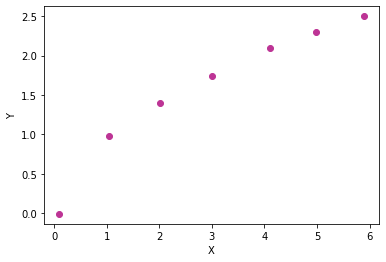

In [2]:
X = np.array([[0.1],   [1.05],  [2.01], [3.003], [4.11], [4.99], [5.89]])
Y = np.array([[-0.01], [0.978], [1.4],  [1.74],  [2.1],  [2.3],  [2.5]])
plt.scatter(X, Y, c=colores[0])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

La gráfica anterior se parece a la función $$f(x)=\sqrt x$$

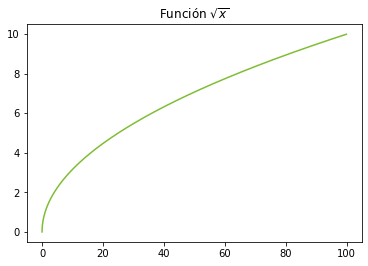

In [3]:
plt.figure(1)
plt.title('Función $\sqrt{x}$')
plt.plot(np.arange(0, 100, 0.1), np.sqrt(np.arange(0, 100, 0.1)), c=colores[1])
plt.show()

### b) Generar nuevas caracteristicas $y=\theta f(x)$ usando la $f(x)$ identificada anteriormente. Calcula los valores correspondientes para las nuevas $x'$.

Básicamente aplicaremos la función $f(x)$ identificada anteriormente a las características ya dadas; en código:


In [4]:
X_prima = np.sqrt(X) # Nuevas características usando la f(x) identificada anteriormente.

Veamos las nuevas características:

In [5]:
print(X_prima)

[[0.31622777]
 [1.02469508]
 [1.41774469]
 [1.73291662]
 [2.02731349]
 [2.23383079]
 [2.42693222]]


### c) Gráficar los datos $(x',y)$ con las caracteristicas $x'$ elegidas.

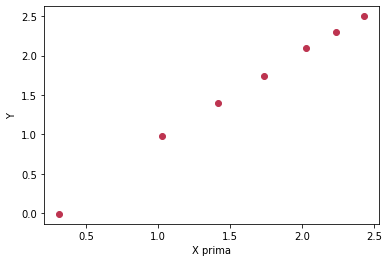

In [6]:
plt.scatter(X_prima, Y, c=colores[2])
plt.xlabel('X prima')
plt.ylabel('Y')
plt.show()

### d) Ajustar el plano/recta en el espacio trandormado $y$ vs $x'$ utilizando la ecuación normal $$\theta=(X^T X)^{-1}X^T Y.$$

In [7]:
X_con_sesgos = np.insert(X_prima, 0, 1, axis=1) # Añadimos los sesgos.

theta = np.dot(np.linalg.inv(np.dot(X_con_sesgos.T, X_con_sesgos)), np.dot(X_con_sesgos.T, Y))

print('Valores de θ:', theta)

Valores de θ: [[-0.30673127]
 [ 1.17670109]]


### e) Calcular la expresión correspondiente en el espacio original (sustituir las $x'$ por la función que representan $f(x)$).

In [8]:
nueva_x_prima = theta[0] + theta[1]*X_con_sesgos.T[1]
print("Valores pasados de x':")
print(X_prima)
print("Nuevos valores de x':")
print(nueva_x_prima)

Valores pasados de x':
[[0.31622777]
 [1.02469508]
 [1.41774469]
 [1.73291662]
 [2.02731349]
 [2.23383079]
 [2.42693222]]
Nuevos valores de x':
[0.06537428 0.89902854 1.36153045 1.7323936  2.07881073 2.32181986
 2.54904252]


Veamos cómo son los puntos calculados con los anteriores:

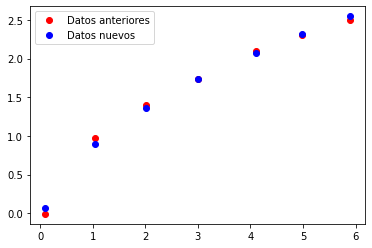

In [9]:
plt.plot(X, Y, 'ro', label='Datos anteriores')
plt.plot(X, nueva_x_prima, 'bo', label='Datos nuevos')
plt.legend()
plt.show()

### f) Gráficar la función ajustada en el espació original $y$ vs $x$.

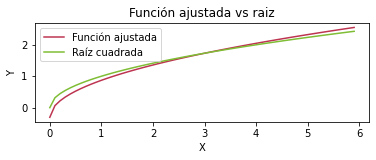

In [10]:
def f(t):
    """Función nueva usando los valores de theta calculados anteriormente."""
    return theta[0] + theta[1]*np.sqrt(t)

t1 = np.arange(0.0, 6.0, 0.1)

plt.figure(1)
plt.subplot(211)
plt.title("Función ajustada vs raíz")
plt.plot(t1, f(t1), 'k', c=colores[2], label='Función ajustada')
plt.plot(t1, np.sqrt(t1), 'k', c=colores[1], label='Raíz cuadrada')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

## Ejercicio 2: Clasificación.

2. Entrene un clasificador utilizando descenso por el gradiente para detectar la frontera entre los datos siguientes.

|       x       |       y       | clasificación |
|---------------|---------------|---------------|
| -0.6861007046 | -2.7317977268 |     FALSO     |
|  0.1945728382 |  0.451296404  |   VERDADERO   |
| -2.3158346172 | -0.6509207096 |     FALSO     |
| -1.0254515503 | -0.0809364635 |   VERDADERO   |
|  0.4311453719 |  0.8026880194 |   VERDADERO   |
| -3.7719061095 |  0.814367149  |     FALSO     |
|  0.8427785188 | -1.0716033783 |   VERDADERO   |
|  2.2864584569 | -2.9176860601 |     FALSO     |
| -0.2791914176 | -0.8346607406 |   VERDADERO   |
| -0.9005654622 | -2.2787579969 |     FALSO     |
|  0.1421184987 | -1.213108765  |   VERDADERO   |
|  3.1509795878 | -3.7415509261 |     FALSO     |
|  0.6174679771 | -0.5790232979 |   VERDADERO   |
|  2.0068530366 | -1.4894149248 |     FALSO     |
|  3.5943855252 | -0.8032932784 |     FALSO     |

    a) Gráficar los datos.
    
    b) Listar características derivadas correspondientes a todos términos de un polinomio de segundo grado y 
    calcular sus valores.
    
    c) Ajustar el plano en el espacio transformado. Observe que no se pide gráficarlo pues este espacio tiene 
    demaciadas dimensiones.
    
    d) Calcular la expresión correspondiente en el espacio original.
    
    e) Gráficar la curva ajustada en el espacio original.

In [11]:
def plot_transformed(X, Y, Theta):
    '''
    Función auxiliar para visualizar la curva descrita por los pesos.
    Parámetros:
    X: Valores de entreada.
    Y: Etiquetas de los valores.
    Theta: Pesos actuales del entrenamiento.
    '''
    Theta = Theta.ravel()
    print("Parámetros iniciales. Theta = ", Theta)
    var('x y')
    p = plot_implicit(Theta[0] + Theta[1] * x + Theta[2] * y + Theta[3] *x*y + Theta[4] * x**2 + Theta[5] * y**2, x, y,
                      title = "Frontera", show=False)
    p.show()
    backend = p._backend
    axes = backend.fig.get_axes()[0]
    c = np.vectorize(lambda b: colores[b])(Y.ravel())
    axes.scatter(X[:,0], X[:,1], color=c)
    return backend.fig

### a) Gráficar los datos.

In [12]:
def cargar_datos():
    X = np.array([[-0.6861007046, -2.7317977268],
                      [0.1845728382, 0.451296404],
                      [-2.3158346172, -0.6509207096],
                      [-1.0254515503, -0.0809364635],
                      [0.4311453719, 0.8026880194],
                      [-3.7719061095, 0.814367149],
                      [0.8427785188, -1.0716033783],
                      [2.2864584569, -2.9176860601],
                      [-0.2791914176, -0.8346607406],
                      [-0.9005654622, -2.2787579969],
                      [0.1421184987, -1.213108765],
                      [3.1509795878, -3.7415509261],
                      [0.6174679771, -0.5790232979],
                      [2.0068530366, -1.4894149248],
                      [3.5943855252, -0.8032932784],])

    Y = np.array([[0],[1],[0],[1],[1],[0],[1],[0],[1],[0], [1], [0], [1], [0], [0]]) # 1 representa VERDADERO y 0 FALSO.

    return (X, Y)

X, Y = cargar_datos()

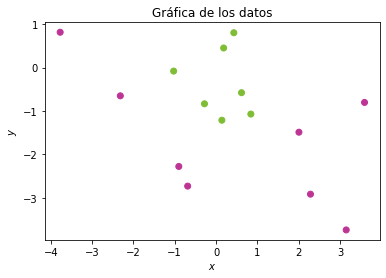

In [13]:
fig = plt.gcf()

plt.title("Gráfica de los datos")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.scatter(X[:,0], X[:,1], color=np.vectorize(lambda b: colores[b])(Y.ravel()))

### b) Listar características derivadas correspondientes a todos términos de un polinomio de segundo grado y  calcular sus valores.

Sean

\begin{align}
  x_0 &= 1 & x_1' &= x_1 & x_2' &= x_2 & x_3' &= x_1 x_2 & x_4' &= x_1^2 & x_5' &= x_2^2
\end{align}

Así, la hipótesis se ve como

\begin{align}
 z(x_0,...,x_5) &= \theta_0 x_0 + \theta_1 x_1' + ... + \theta_5 x_5' \\
 h_\Theta(x_0,...,x_5) &= sigmoide(z).
\end{align}

In [14]:
# Recordemos que, por el momento, X tiene solo dos columnas: x_1 y x_2.

XCross = np.prod(X, axis=1, keepdims=True) # x_3 prima = (x_1)(x_2).
XSquare = X ** 2                           # Valores de x_4 prima y x_5 prima. El elevado al cuadrado se hace por columnas, por lo que no interfiere x_1 con x_2 ni viceversa.

X = np.hstack((np.ones((len(X), 1)), X)) # Agregamos los valores correspondientes a x_0.
X = np.hstack((X, XCross, XSquare))      # Juntamos los valores de x_3 prima, x_4 prima y x_5 prima en un solo arreglo.

Por lo tanto, los valores obtenidos son:

In [15]:
print(X)

[[ 1.00000000e+00 -6.86100705e-01 -2.73179773e+00  1.87428835e+00
   4.70734177e-01  7.46271882e+00]
 [ 1.00000000e+00  1.84572838e-01  4.51296404e-01  8.32970582e-02
   3.40671326e-02  2.03668444e-01]
 [ 1.00000000e+00 -2.31583462e+00 -6.50920710e-01  1.50742471e+00
   5.36308997e+00  4.23697770e-01]
 [ 1.00000000e+00 -1.02545155e+00 -8.09364635e-02  8.29964220e-02
   1.05155088e+00  6.55071112e-03]
 [ 1.00000000e+00  4.31145372e-01  8.02688019e-01  3.46075225e-01
   1.85886332e-01  6.44308056e-01]
 [ 1.00000000e+00 -3.77190611e+00  8.14367149e-01 -3.07171642e+00
   1.42272757e+01  6.63193853e-01]
 [ 1.00000000e+00  8.42778519e-01 -1.07160338e+00 -9.03124308e-01
   7.10275632e-01  1.14833380e+00]
 [ 1.00000000e+00  2.28645846e+00 -2.91768606e+00 -6.67116797e+00
   5.22789228e+00  8.51289195e+00]
 [ 1.00000000e+00 -2.79191418e-01 -8.34660741e-01  2.33030115e-01
   7.79478477e-02  6.96658552e-01]
 [ 1.00000000e+00 -9.00565462e-01 -2.27875800e+00  2.05217075e+00
   8.11018152e-01  5.1927

### c) Ajustar el plano en el espacio transformado. Observe que no se pide gráficarlo pues este espacio tiene demaciadas dimensiones.

In [16]:
Theta = np.random.random((len(X[0]), 1)) * 4
print('Valores para θ:', Theta)

Valores para θ: [[0.75536376]
 [0.54588653]
 [3.42236296]
 [3.112147  ]
 [1.30483326]
 [3.63025021]]


### d) Calcular la expresión correspondiente en el espacio original.

Para esto usaremos el descenso del gradiente considerando a $\alpha = 0.15$:

In [17]:
def sigmoide(M):
    """
    Función sigmoide.
    Parámetros:
    M: Valores de entreada.
    """
    return 1 / (1 + np.exp(-M))

def descenso(X, Y, Theta, iteraciones):
    """
    Realiza descenso por el gradiente sobre los datos en X, con respuestas esperadas Y.
    Parámetros:
    iteraciones: Número de iteraciones que se van a usar para el descenso por gradiente.
    """
    figsize(4, 3)
    errores = np.zeros(iteraciones)
    m = len(X)
    alpha = 0.15
  
    for i in range(0, iteraciones):
        H          = sigmoide(np.dot(X, Theta))
        errores[i] = (np.sum(Y * np.log(H) + (1 - Y) * np.log(1 - H))) / -m
        gradiente  = np.dot(X.T, H-Y) / 6
        Theta      = Theta -  (alpha*gradiente)

    # Imprimimos cómo se fue comportando el error.
    plt.title("Función coste")
    plt.xlabel("Número de iteraciones")
    plt.ylabel("Error")
    plt.plot(np.arange(iteraciones), errores)

    return Theta

Así, ejecutemos el algoritmo para obtener los valores de theta:

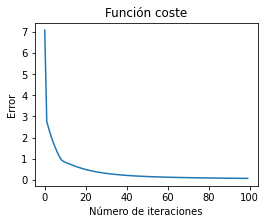

In [18]:
Theta = descenso(X, Y, Theta, 100)

### e) Gráficar la curva ajustada en el espacio original.

Parámetros iniciales. Theta =  [ 4.26237538  1.58217533  2.56217613  0.71024744 -0.90588786 -0.04398471]


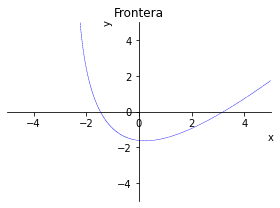

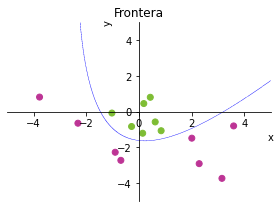

In [19]:
X, Y = cargar_datos()

plot_transformed(X, Y, Theta)